In [4]:
from sklearn import tree

In [51]:
feature=[[123,1],[200,2],[230,1],[500,2],[700,2],[800,2],[1200,2]]
label=[1,1,1,2,2,3,3]
DTC=tree.DecisionTreeClassifier()

In [52]:
DTC.fit(feature,label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
from matplotlib import pyplot

In [54]:
pyplot.plot(range(1000),DTC.predict([list(j) for j in zip(list(range(1000)),list([1 for i in range(1000)]))]))

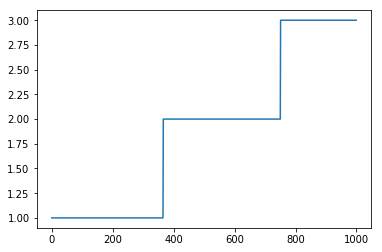

In [55]:
pyplot.show()

In [142]:
from sklearn import datasets
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [143]:
iris=datasets.load_iris()
test_idx=[1,50,100]

#axis=0 (保持原格式 (150,4) 沒下會變(600,1) 
train_data=np.delete(iris.data,test_idx,axis=0)
train_target=np.delete(iris.target,test_idx)

test_data=iris.data[test_idx]
test_target=iris.target[test_idx]

In [144]:
DTC=DecisionTreeClassifier()
DTC.fit(train_data,train_target)
DTC.predict(test_data)

array([0, 1, 2])

In [145]:
from sklearn.externals.six import StringIO
import pydot

In [146]:
dot_data=StringIO()
tree.export_graphviz(DTC,out_file=dot_data,feature_names=iris.feature_names,
                     class_names=iris.target_names,filled=True,rounded=True,impurity=False)
graph=pydot.graph_from_dot_data(dot_data.getvalue())[0]

In [152]:
graph.write_jpe(r"tree.jpg")

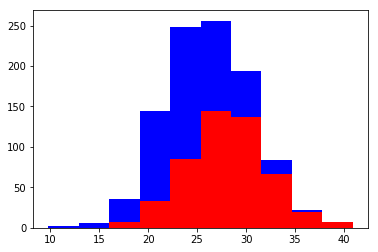

In [169]:
import numpy as np
import matplotlib.pyplot as plt
greyhounds=500
labs=500
grey_height=28+4*np.random.randn(greyhounds)
lab_height=24+4*np.random.randn(labs)

#stacked 堆疊
plt.hist([grey_height,lab_height],stacked=True,color=['r','b']) 
plt.show()

In [188]:
from sklearn import datasets
iris=datasets.load_iris()
X=iris.data
Y=iris.target
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.5)
# from sklearn import tree|
# my_classifier = tree.DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()

my_classifier.fit(X_train,Y_train)
predictions=my_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.9466666666666667


# 自製分類器

In [214]:
import random
class MyRandomClassifier:
    def fit(self,X_train,Y_train):
        self.X_train=X_train
        self.Y_test=Y_test
        
    def predict(self,X_test):
        predictions=[]
        for row in X_test:
            label=random.choice(Y_train)
            predictions.append(label)
        return predictions

In [215]:
my_classifier = MyKNNClassifier()

my_classifier.fit(X_train,Y_train)
predictions=my_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.30666666666666664


# KNN

In [239]:
from scipy.spatial import distance
import random
class MyKNNClassifier:
    def fit(self,X_train,Y_train):
        self.X_train=X_train
        self.Y_train=Y_train
        
    def predict(self,X_test):
        predictions=[]
        for row in X_test:
            label=self.closest(row)
            predictions.append(label)
        return predictions
    def closest(self,row):
        best_dist=distance.euclidean(row,X_train[0])
        best_index=0
        for i in range(1,len(X_train)):
            dist=distance.euclidean(row,X_train[i])
            if dist<best_dist:
                best_dist=dist
                best_index=i
        return self.Y_train[best_index]

In [243]:
my_classifier =MyKNNClassifier()

my_classifier.fit(X_train,Y_train)
predictions=my_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.96
